In [1]:
import os
import sys
sys.path.append('/home/yang_liu/python_workspace/gaussian-splatting-lightning')

import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plyfile import PlyData, PlyElement

In [2]:
file_dir = '../data/GauU_Scene/Downsampled/LFLS/lidar.ply'
transform_dir = '../data/GauU_Scene/LFLS/transformation.txt'
plydata = PlyData.read(file_dir)
data = plydata.elements[0].data
data_pd = pd.DataFrame(data)
data_np = np.zeros(data_pd.shape, dtype=np.float32)
property_names = data[0].dtype.names
for i, name in enumerate(property_names):
    data_np[:, i] = data_pd[name]

In [3]:
from scipy.spatial import ConvexHull
# MatrixCity
# filtered_pcd = data_np[data_np[:, 2] > 0.0]
# color = filtered_pcd[:, 6:9] / 255.0
# GauU-Scene
with open(transform_dir, 'r') as f:
    transform = np.loadtxt(f)
filtered_pcd = data_np
filtered_pcd[:, :3] = filtered_pcd[:, :3] @ transform[:3, :3]
color = filtered_pcd[:, 3:6] / 255.0

hull = ConvexHull(filtered_pcd[:, :2], 'Qg')
hull_list=hull.vertices.tolist()

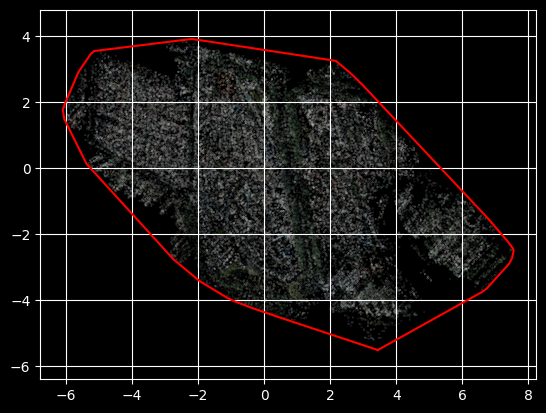

In [4]:
plt.figure()
plt.scatter(filtered_pcd[::100, 0], filtered_pcd[::100, 1], s=0.01, c=color[::100])
plt.plot(filtered_pcd[hull_list + [hull_list[0]], 0], filtered_pcd[hull_list + [hull_list[0]], 1], 'r-')
plt.grid()
plt.axis('equal')
plt.show()

In [5]:
print(f"Z min: {np.min(filtered_pcd[:, 2])}, Z max: {np.max(filtered_pcd[:, 2])}")
for idx in hull_list:
    print(f"[ {filtered_pcd[idx, 0]}, {filtered_pcd[idx, 1]}, 0.0 ],")

Z min: -6.053140163421631, Z max: 3.0644257068634033
[ 3.4412789344787598, -5.5088210105896, 0.0 ],
[ 3.4428353309631348, -5.508098602294922, 0.0 ],
[ 6.601006031036377, -3.7495105266571045, 0.0 ],
[ 6.737905979156494, -3.644395351409912, 0.0 ],
[ 7.420580863952637, -2.891446828842163, 0.0 ],
[ 7.5051493644714355, -2.7228848934173584, 0.0 ],
[ 7.55123233795166, -2.5028562545776367, 0.0 ],
[ 7.551913261413574, -2.499234199523926, 0.0 ],
[ 7.552060127258301, -2.497939109802246, 0.0 ],
[ 7.53003454208374, -2.4346795082092285, 0.0 ],
[ 7.365996837615967, -2.2168545722961426, 0.0 ],
[ 6.785088539123535, -1.5395923852920532, 0.0 ],
[ 2.9687633514404297, 2.5233960151672363, 0.0 ],
[ 2.683088541030884, 2.8023500442504883, 0.0 ],
[ 2.5650734901428223, 2.909266948699951, 0.0 ],
[ 2.208796739578247, 3.208524703979492, 0.0 ],
[ 2.1651508808135986, 3.2408103942871094, 0.0 ],
[ -2.187723159790039, 3.903245449066162, 0.0 ],
[ -5.132291316986084, 3.5373477935791016, 0.0 ],
[ -5.137989521026611, 3.5361